In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [21]:
sns.set(rc={'figure.figsize': (12,8)})

## Estadística frecuentista
- La probabilidad de un evento es la frecuencia relativa con la que ocurre; si tiro una moneda, la mitad de las veces va  a salir cara en el largo plazo (probabilidad $\frac{1}{2})$.
- Se diferencia de la estadística _bayesiana_, donde la probabilidad de un evento es el grado de creencia en que ese evento vaya a ocurrir; si tiro una moneda, mi creencia en que va a salir cara es $\frac{1}{2}$.

## Variables aleatorias
- Una variable aleatoria es una variable que puede tomar distintos valores, los resultados de un evento aleatorio. Por ejemplo, tirar una moneda se puede pensar como una variable aleatoria $X$ con dos posibles valores: 0 y 1 (cara y ceca), cada uno con una cierta probabilidad (tipicamente $\frac{1}{2}$).
- En el ejemplo anterior, la probabilidad de que el resultado de $X$ sea cara se escribe $ P(X=0) $.

## Variables discretas
Son las variables donde el conjunto de valores posibles es discreto.

### Ejemplos
- Distribución uniforme (discreta): Hay $n$ resultados posibles, todos con la misma probabilidad (tirar una moneda o un dado).
- Distribucion Bernoulli $X \sim Ber(p)$: Dos posibles resultados, uno con probabilidad $0 < p < 1$ y el otro con probabilidad $1-p$ (obvio). Una moneda con probabilidad $p$ de que salga cara es $Ber(p)$.
- Distribución binomial $X \sim B(n,p)$: Realizo $n$ experimentos independientes, cada uno $Ber(p)$, y cuento cuantos fueron exitosos. Por ejemplo, tiro una moneda $n$ veces y cuento cuantas veces salió cara.
- Distribución Poisson $X \sim P(\lambda)$: Da la probabilidad de que ocurran $k$ eventos en un cierto intervalo de tiempo, si sabemos cuántos suelen ocurrir en promedio. Por ejemplo, si un banco recibe 100 clientes por hora en promedio, una variable $X \sim P(\lambda)$ da la probabilidad de que en la siguiente hora lleguen $k$ clientes.

Todas estas distribuciones se pueden samplear en numpy con la librería `random`:

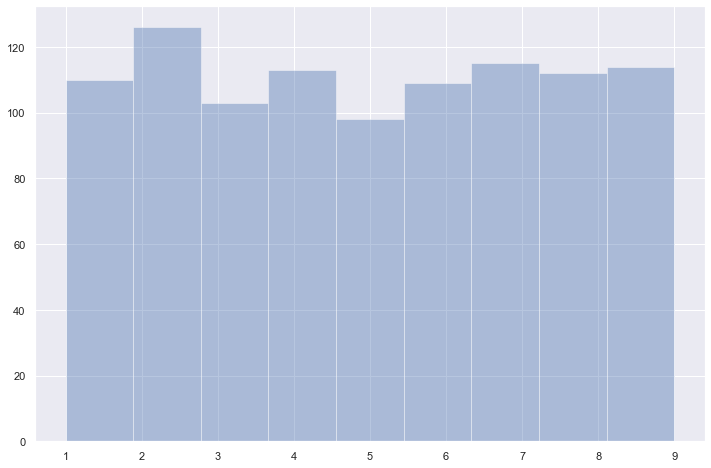

In [90]:
# Devuelve 100 números al azar entre 1 y 9 (100 sampleos de una istribución uniforme discreta
# con resultados posibles {1,2,...,9})
samples = np.random.randint(1, 10, 1000)
sns.distplot(samples, bins=9, kde=False);

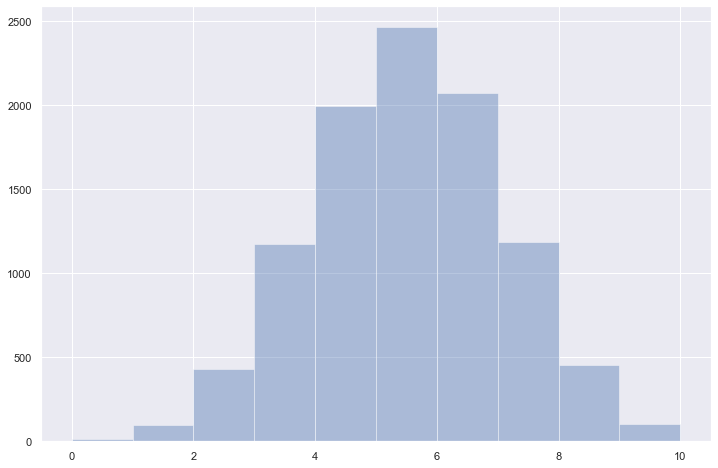

In [86]:
# 10000 samples de una binomial (n, p)
n = 10
p = 0.5
samples = np.random.binomial(n, p, 10000)
sns.distplot(samples, bins=10, kde=False);

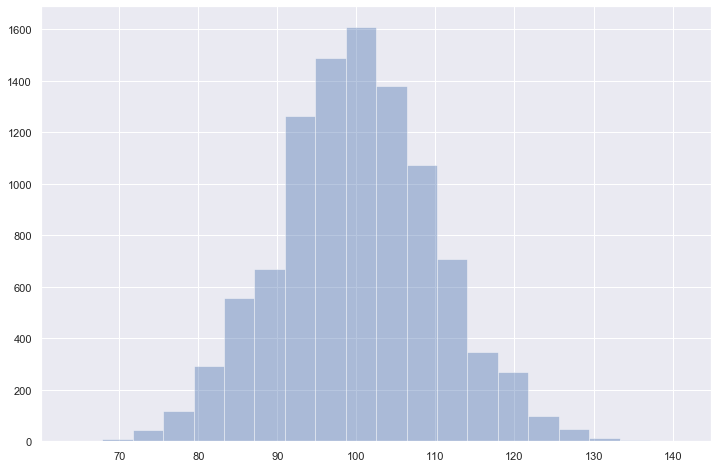

In [89]:
# 10000 samples de una Poisson 
lambda_ = 100
samples = np.random.poisson(lambda_, 10000)
sns.distplot(samples, bins=20, kde=False);

## Variables continuas
- El conjunto de valores posibles es un continuo, por ejemplo, un número real entre $0$ y $1$.
- Suelen representarse a través de una _densidad_, una función que da la probabilidad de cualquier evento como el área que define el gráfico de la función. La densidad es como un 'histograma continuo' (la cantidad de _bins_ tiende a infinito). 
- No se suele hablar de la probabilidad de un punto, sino de una región (la probabilidad de que $X$ esté entre $a$ y $b$).

### Ejemplos
- Distribución uniforme (continua) $X \sim U(a,b)$: Los valores posibles son los números reales entre $a$ y $b$, todos con la misma probabilidad.
- Distribucion normal $X \sim N(\mu, \sigma)$: La más conocida, los valores posibles son toda la recta real, la densidad es una _campana de Gauss_, con centro en $\mu$ y "ancho" controlado por $\sigma$. Si $n$ es grande, la binomial $B(n,p)$ se parece mucho a la normal (el limite da normal).
- Distribución Log-Normal $X \sim LogNormal(\mu, \sigma^2)$: Usada mucho en finanzas para modelar, por ejemplo, los precios de acciones, es la distribución que cumple que $log(X)$ tiene distribución normal. Su densidad es como una campana de Gauss pero "estirada" hacia la derecha.

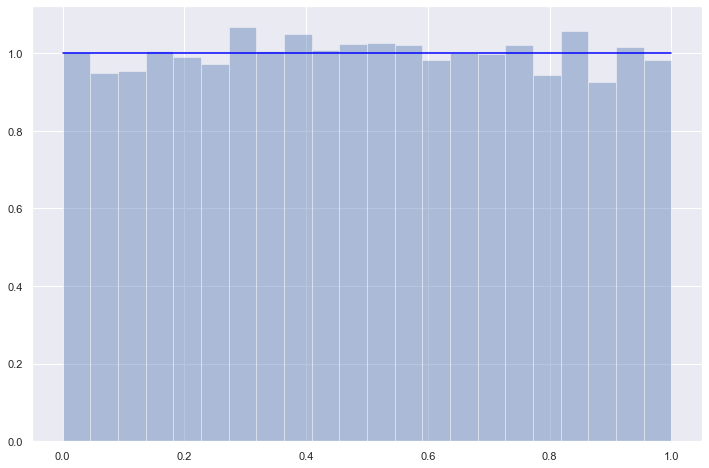

In [92]:
x=np.linspace(0,1,1000)
plt.plot(x,stats.uniform.pdf(x),color='blue');

# 10000 samples de una uniforme (0, 1)
samples = np.random.uniform(0, 1, 10000)
sns.distplot(samples, kde=False, norm_hist=True);

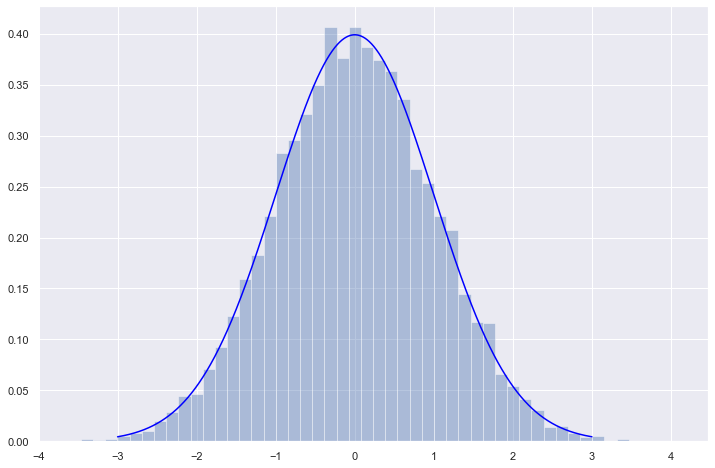

In [91]:
# Normal (0,1)
x=np.linspace(-3,3,10000)
plt.plot(x,stats.norm.pdf(x),color='blue');

# 10000 samples de una normal (0, 1)
mu = 0
sigma = 1
samples = np.random.normal(mu, sigma, 10000)
sns.distplot(samples, kde=False, norm_hist=True);

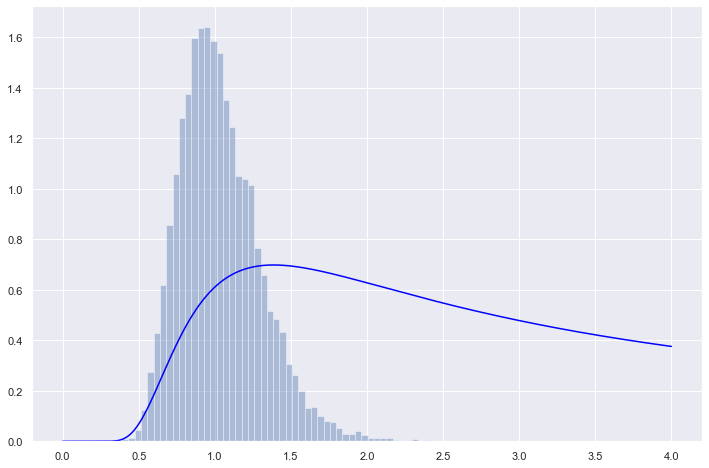

In [125]:
# Log-Normal (0, 0.25)
sigma = 0.25

x=np.linspace(0,4,10000)
plt.plot(x,stats.lognorm.pdf(sigma, x),color='blue');

# 10000 samples de una normal (0, sigma)
samples = np.random.lognormal(0, sigma, 10000)
sns.distplot(samples, kde=False, norm_hist=True);